In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Estandarización
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats

# Encoding
# ==============================================================================
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Guardar modelo
# ==============================================================================
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga del csv
# ==============================================================================

df_sample = pd.read_csv("../data/sample_submission.csv")
df_test = pd.read_csv("../data/test.csv")
df_train = pd.read_csv("../data/train.csv")

In [3]:
# Vemos cómo se ve el DF
# ==============================================================================

df = df_train.copy()
df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183


In [4]:
# Análisis exploratorio
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [5]:
# Número de datos nulos por columna
# ==============================================================================

df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
# Número de datos duplicados
# ==============================================================================

df.duplicated().sum()

0

# 1- Ánalisis Descriptivo

In [7]:
df["price"].value_counts()

6.405    101
6.438     96
6.687     94
6.719     94
6.654     91
        ... 
5.881      1
7.146      1
5.903      1
5.864      1
5.852      1
Name: price, Length: 3512, dtype: int64

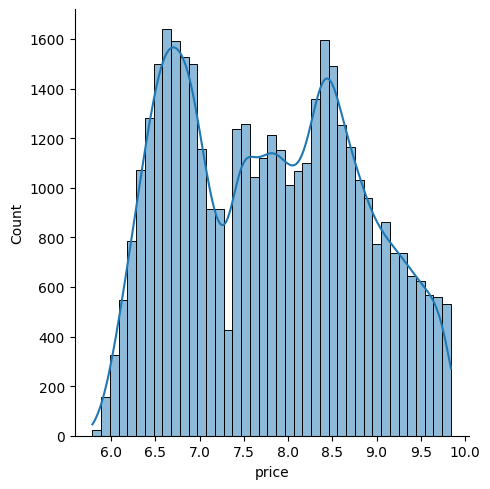

In [8]:
# Displot de price para ver cómo se distribuyen los datos de nuestra variable predictora
# ==============================================================================

sns.displot(data = df,
             x = "price",
             kde = True);

### Más adelante tendremos que estandarizar, normalizar los datos

In [9]:
# Exploramos cuáles son los principales estadísticos de las variables respuesta
# ==============================================================================

df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
id,40455.0,20227.000000,11678.496907,0.000,10113.500,20227.00,30340.500,40454.000
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


In [10]:
# Exploramos cuáles son los principales estadísticos de las variables respuesta
# ==============================================================================

df.describe(include = "object").T

,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


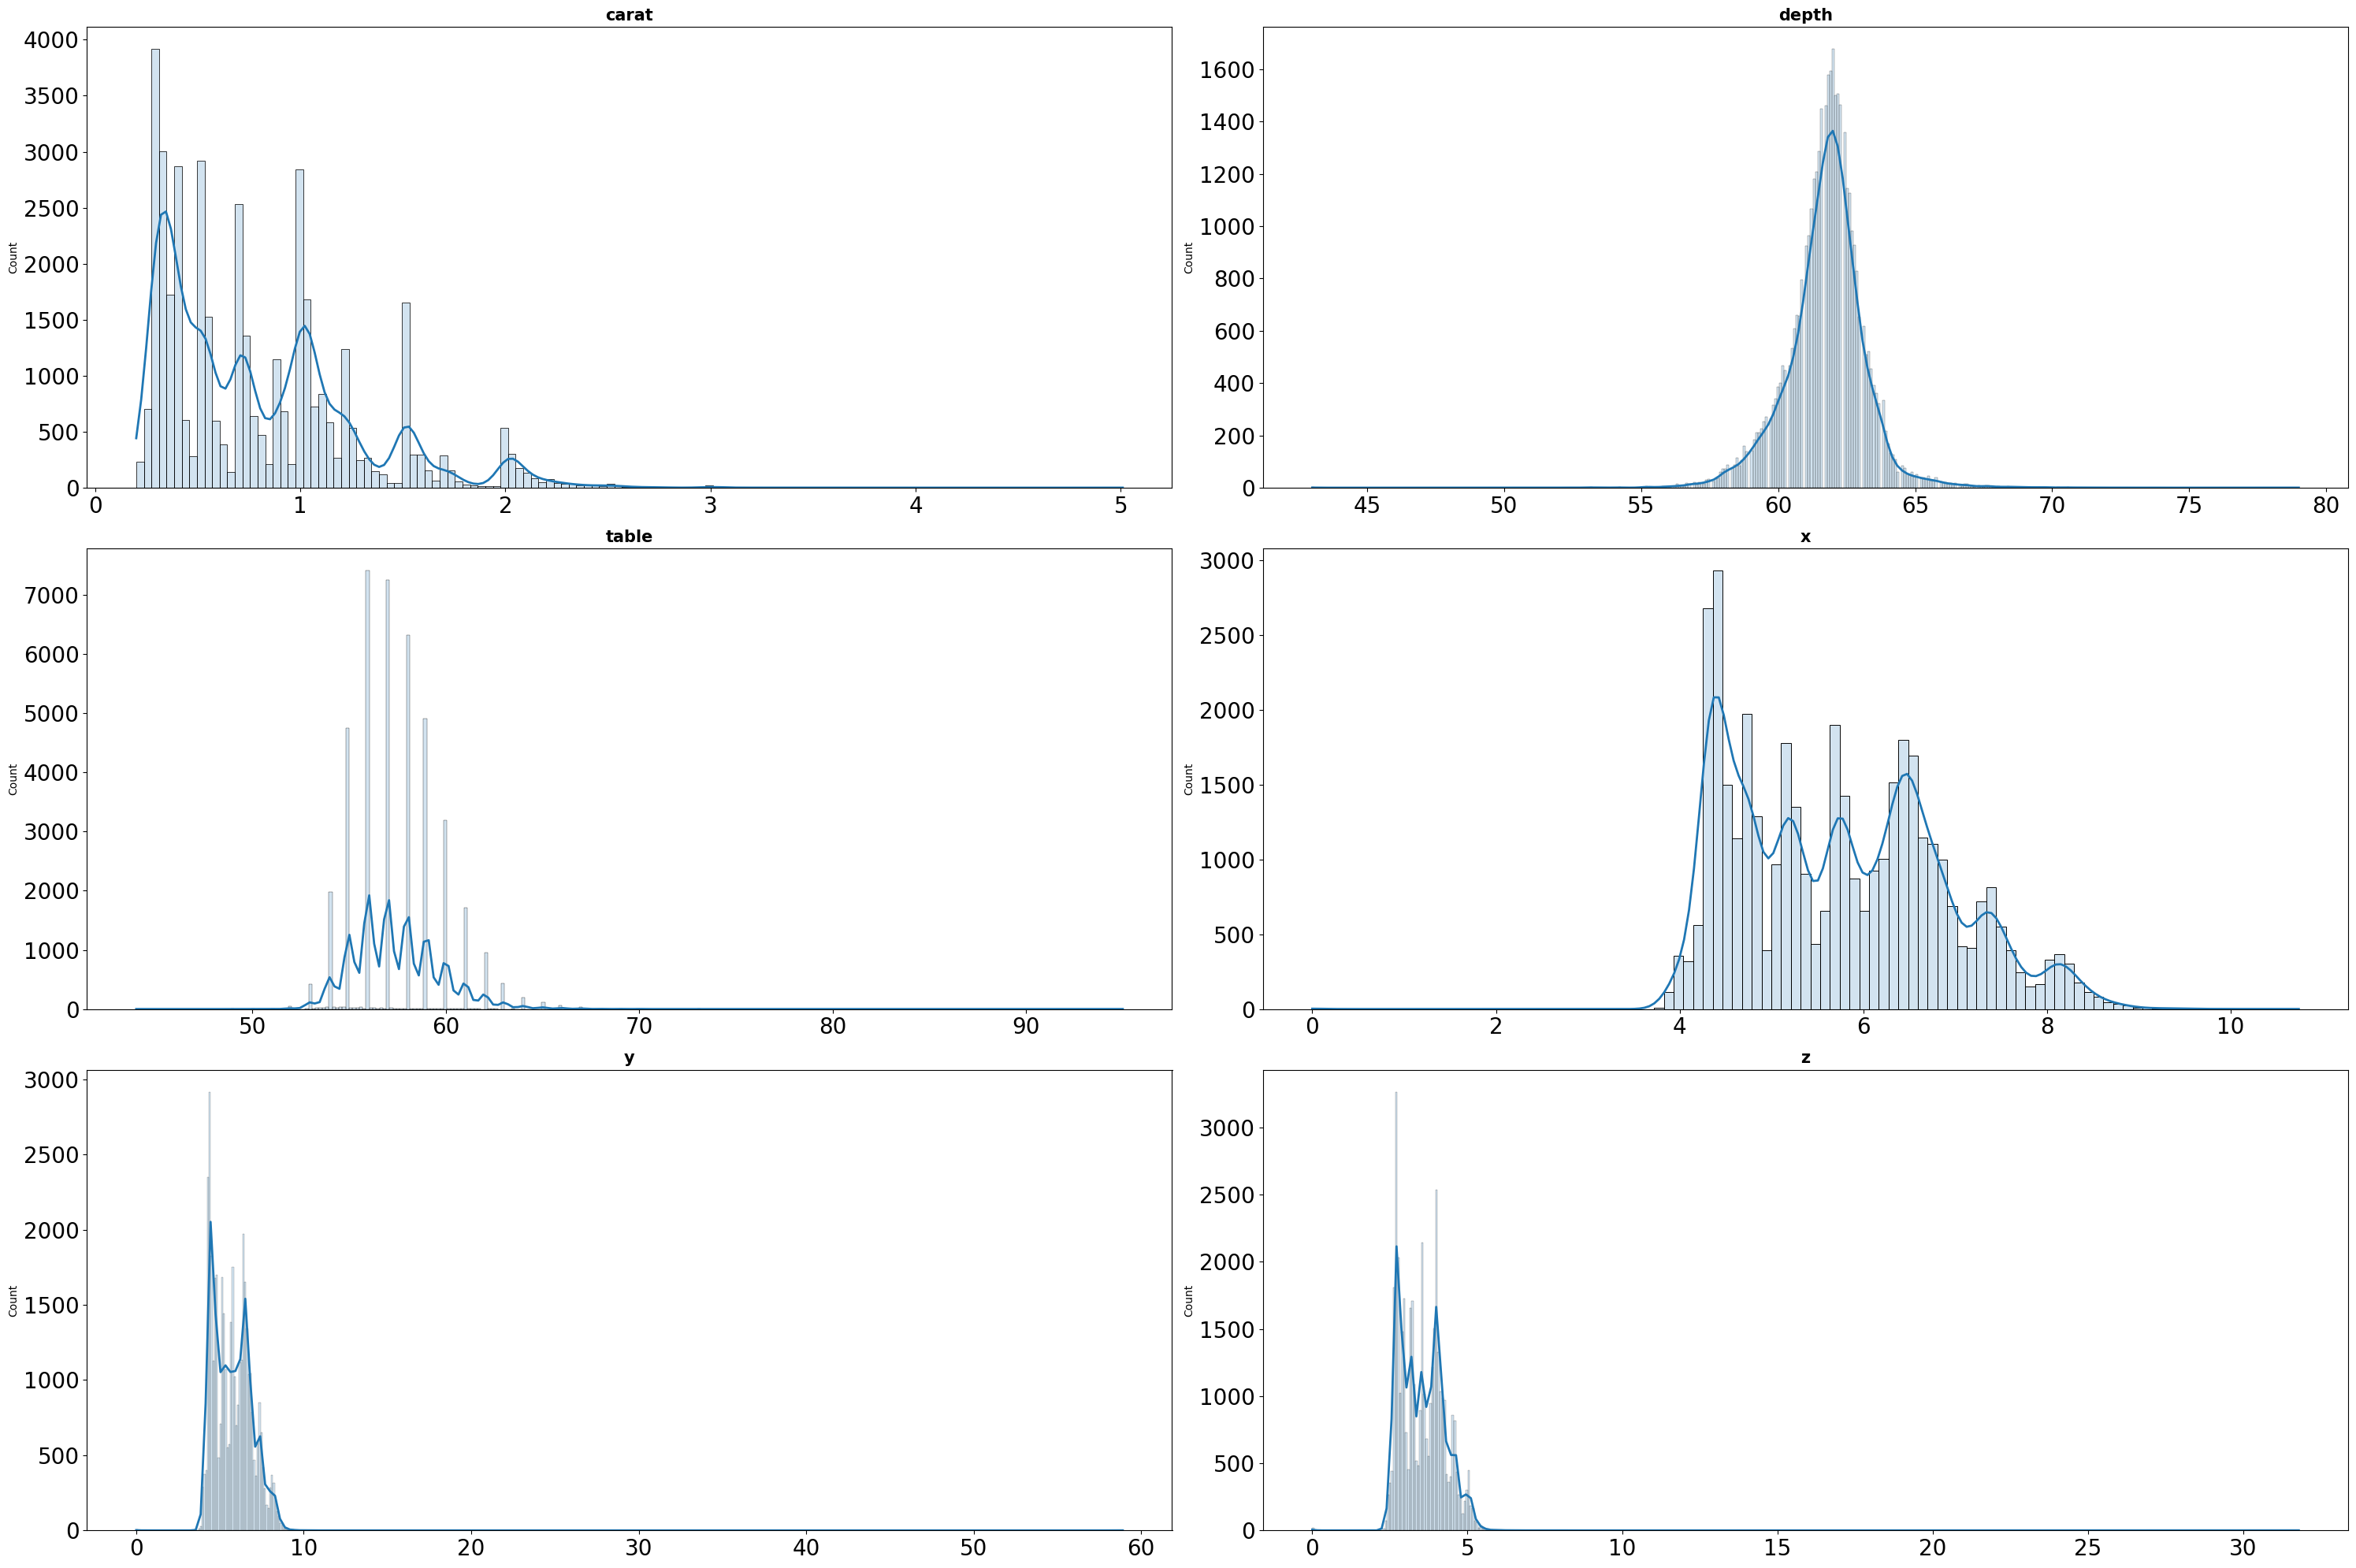

In [11]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 20))


axes = axes.flat

columnas_numeric = df.drop(["id", "price"], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data = columnas_numeric,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

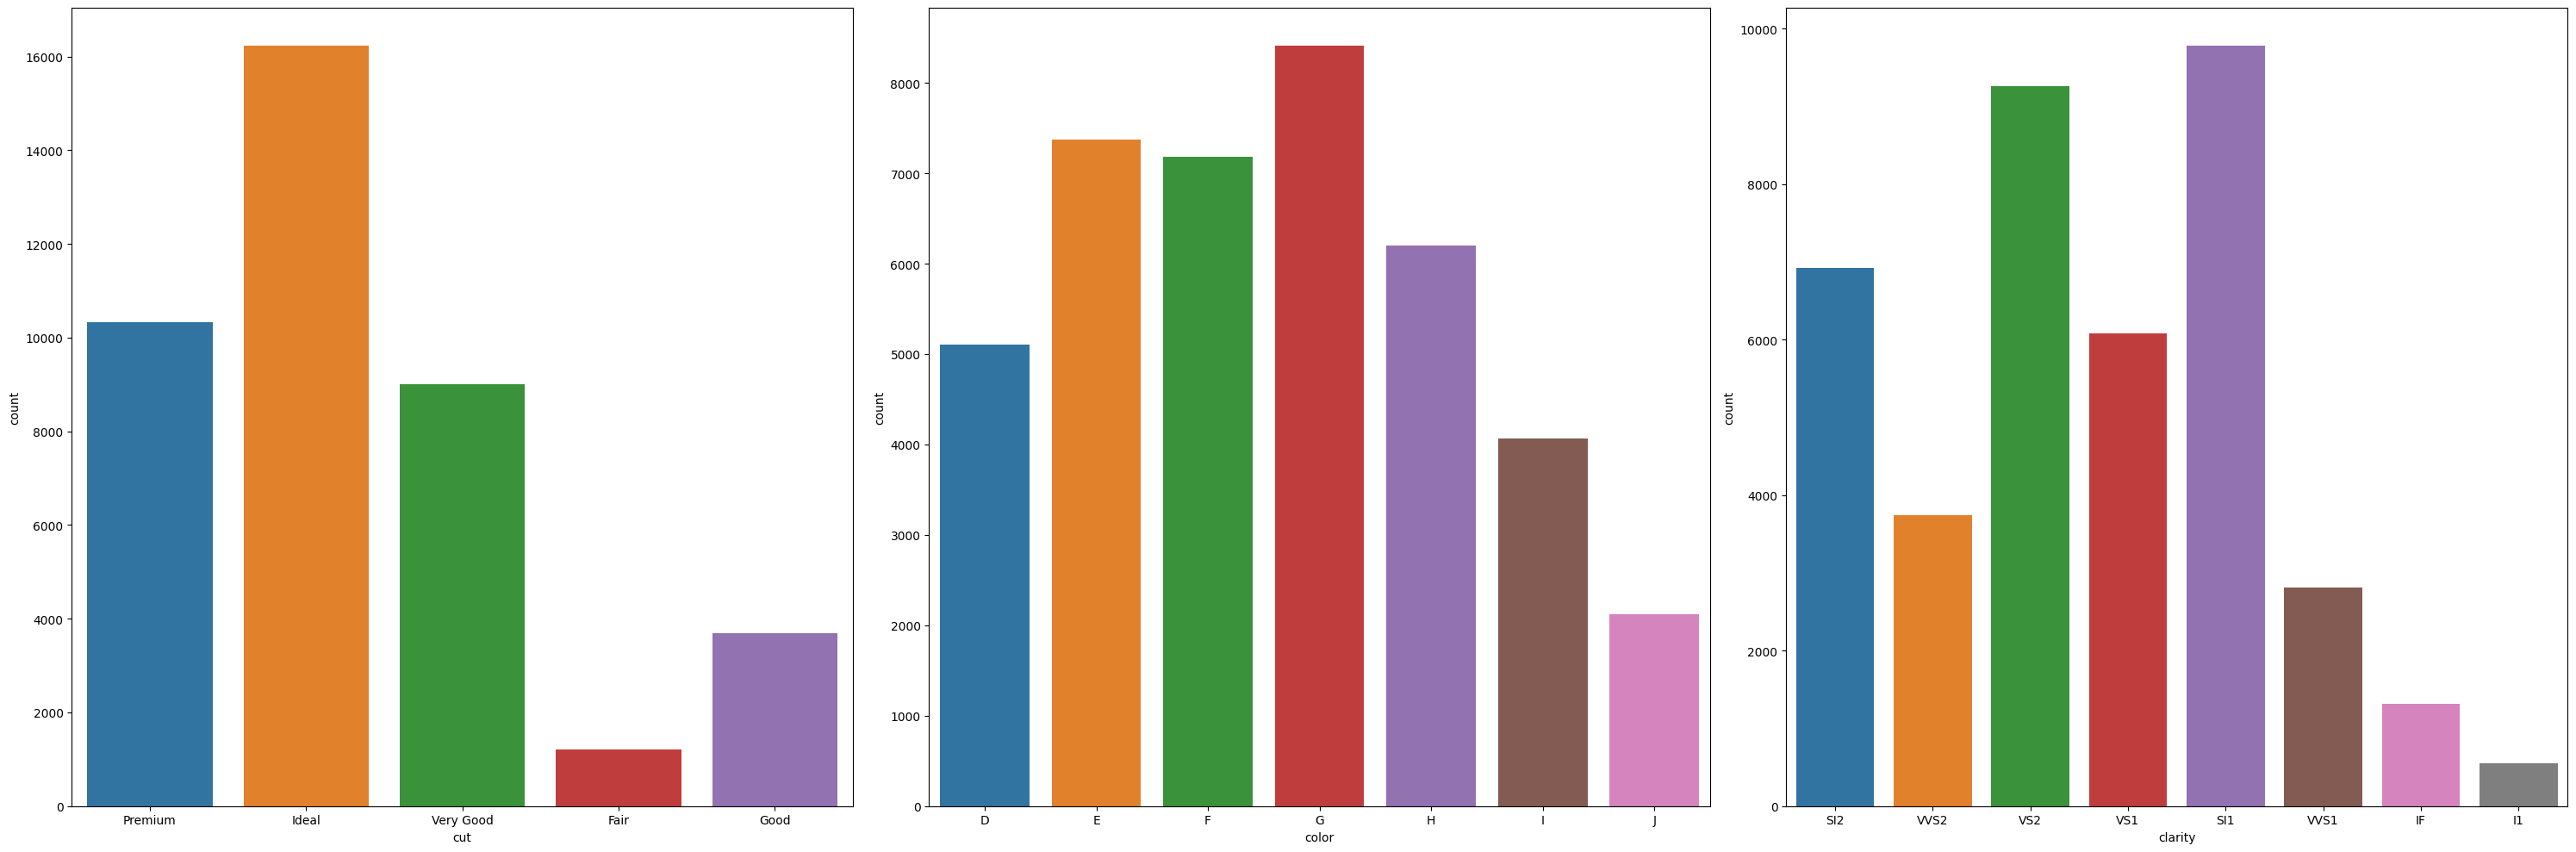

In [12]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df[colum], 
                ax = axes[i])

fig.tight_layout();

### Comprobamos si las variables tienen un orden o no

### Vemos el ratio y la distribución de las variables no numéricas respecto al Price, y si tienen un orden o no

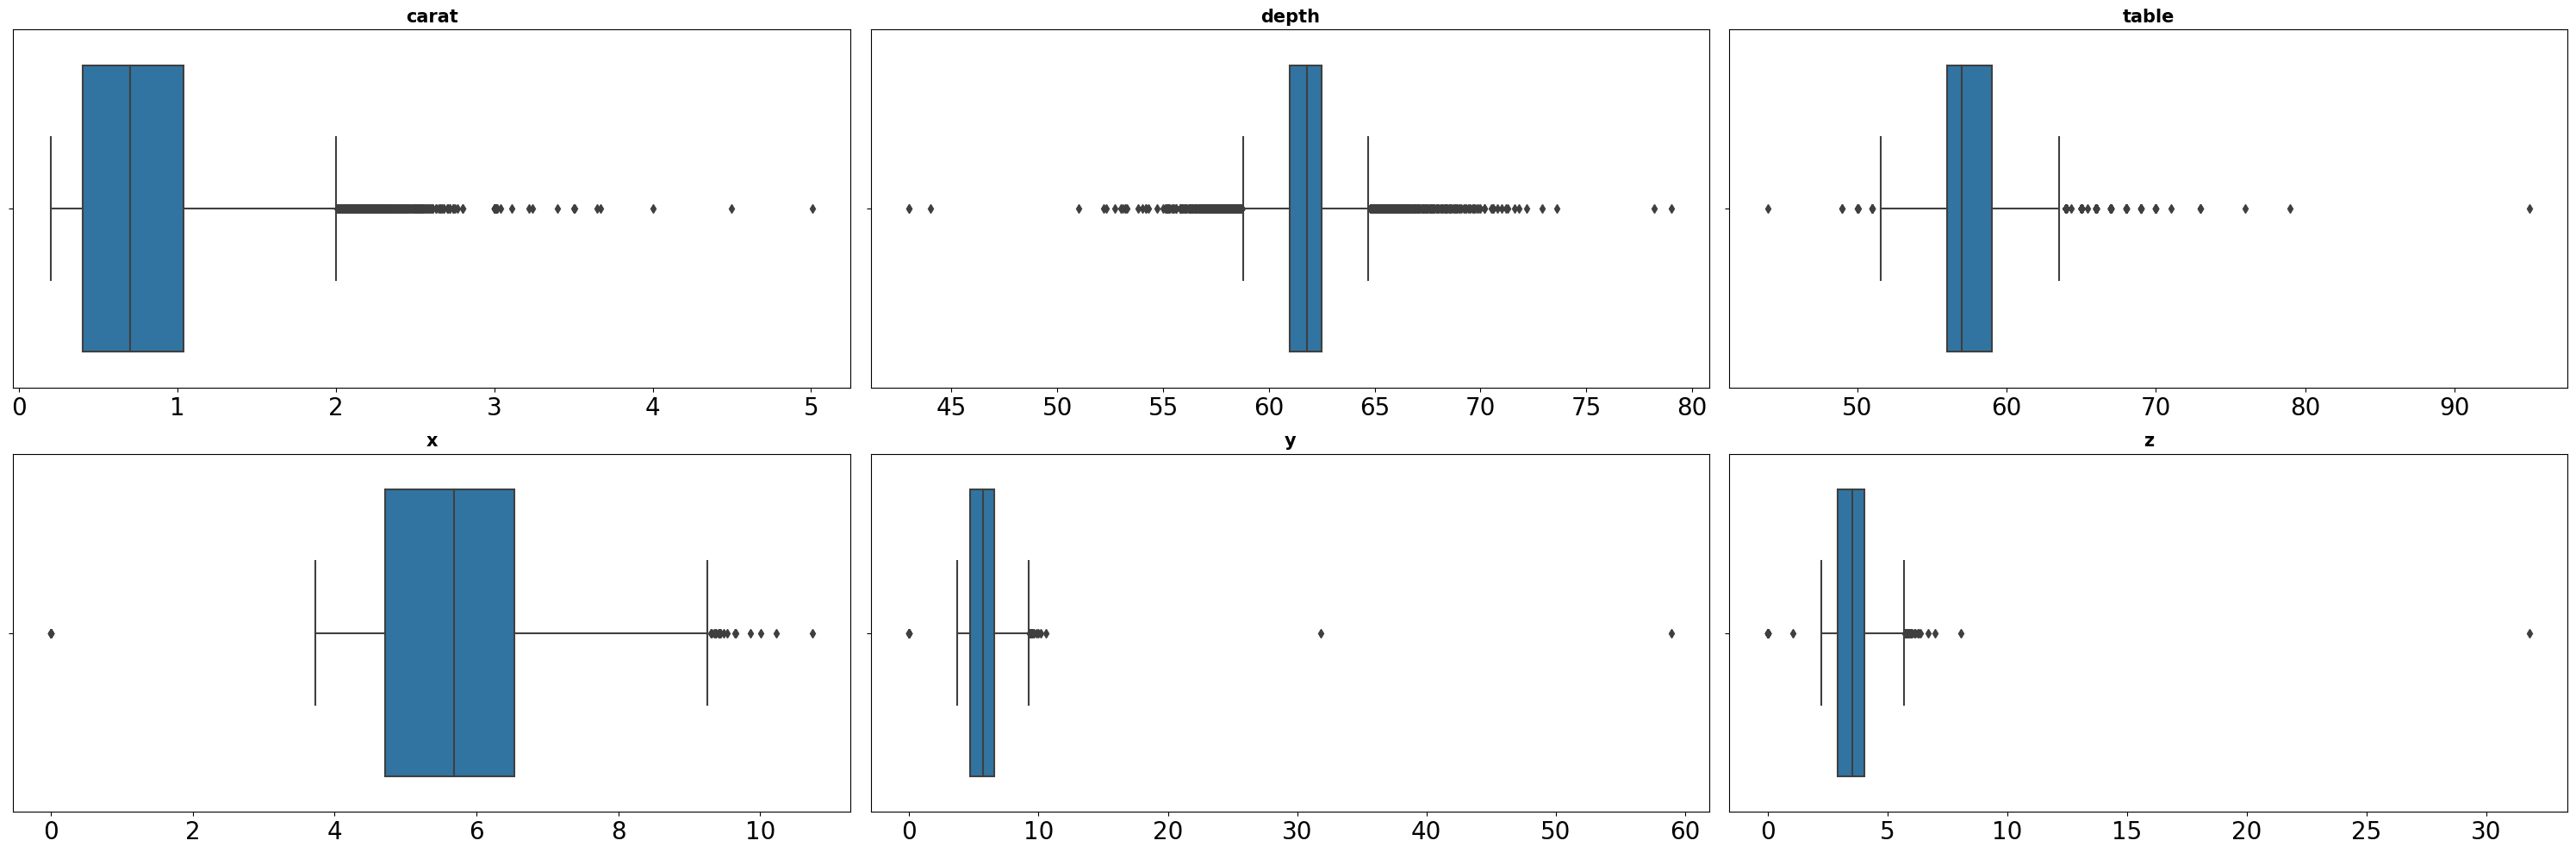

In [13]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.drop(["id", "price"], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.boxplot(
        data = df,
        x = colum,  
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

### Vemos que hay varios Outliers, luego veremos cómo los tratamos

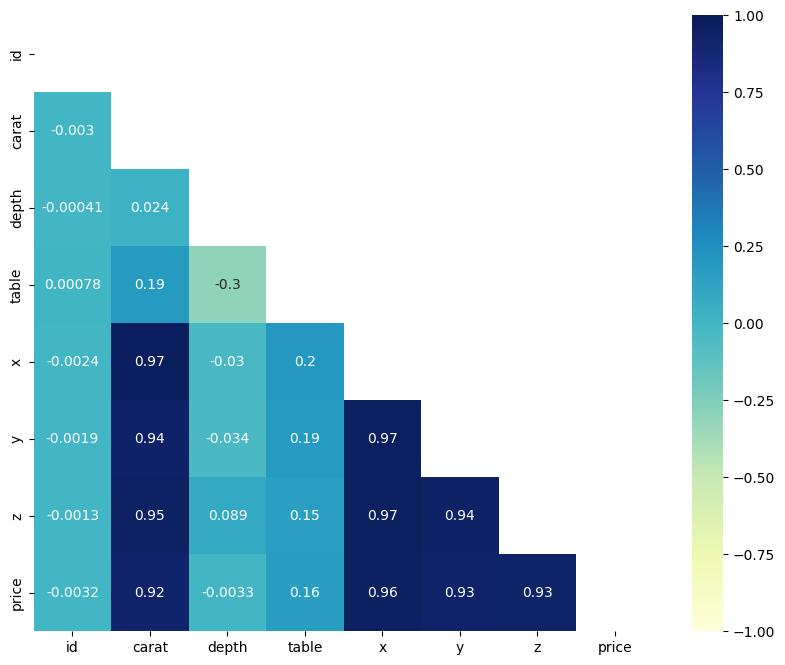

In [14]:
# Creamos una mask para visualizar mejor nuestra matriz de correlación de forma triangular
# ==============================================================================

mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin = -1,
           vmax= 1);

### Las variables numéricas que mayor correlación tienen con nuestra variable respuesta son carat (peso del diamante ), x (longitud), y (anchura) y z (profundiadd).

# 3- Estandarización

In [15]:
# Vamos a hacer una copia del df
# ==============================================================================

df_RS = df.copy()

In [16]:
# Vamos a extraer de nuevo las columnas numéricas del df que no contiene nulos, excluyendo las variables discretas
# Estandarizamos las variables numéricas con Robust Scaler, ajustando el modelo con .fit y convirtiendo el array en un dataframe
# ==============================================================================

def standardize_numeric_data(df):
    # Extraer columnas numéricas excluyendo variables discretas
    num_columns = df.select_dtypes(include=np.number).drop(['id', 'price'], axis=1).columns
    
    # Crear objeto RobustScaler y ajustarlo a las columnas numéricas
    robust = RobustScaler()
    robust.fit(df[num_columns])
    
    # Transforma las columnas numéricas y convierte el array resultante en un dataframe
    X_robust = robust.transform(df[num_columns])
    df[num_columns] = X_robust
    
    with open(f'../data/rob_sacler.pkl', 'wb') as rob_scal:
        pickle.dump(robust, rob_scal)  

    return df

In [17]:
num_columns = df.select_dtypes(include=np.number).drop(['id', 'price'], axis=1).columns
num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [18]:
df2 = standardize_numeric_data(df_RS)
df2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,-0.625000,Premium,D,SI2,0.400000,0.333333,-0.754098,-0.780220,-0.750000,6.353
1,1,0.484375,Ideal,E,VVS2,0.600000,-0.333333,0.398907,0.417582,0.464286,9.183
2,2,0.031250,Ideal,F,VS2,0.000000,0.666667,0.010929,0.021978,0.017857,7.983
3,3,0.593750,Very Good,G,SI2,0.933333,0.000000,0.464481,0.439560,0.535714,8.371
4,4,-0.531250,Premium,G,VS1,0.333333,0.666667,-0.650273,-0.631868,-0.625000,6.588


# 4- Encoding

In [19]:
# Volvemos a hacermos una copia para probar nuestra función con dos columnas
# ==============================================================================

df2 = df.copy()
df2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [ ]:
# Vamos a definir una función que nos prepare las variables que tienen orden, para codificar, 
# calcula los valores únicos de cada columna y devuelve un diccionario que contiene los valores únicos de cada columna. 
# Vamos a definir una función que nos aplique el método Ordinal Encoder
# Guardamos el resultado en un .pkl
# ==============================================================================


def ordinal_encoder(df, columns_to_encode):
    unique_values_dict = {}
    for column in columns_to_encode:
        value_counts = df[column].value_counts()
        unique_values = pd.DataFrame(value_counts).reset_index().sort_values(by=column)['index'].unique().tolist()
        unique_values_dict[column] = sorted(unique_values)
        
        ordinal = OrdinalEncoder(categories=[unique_values], dtype=int)
        transformed_oe = ordinal.fit_transform(df[[column]])
        oe_df = pd.DataFrame(transformed_oe)
        oe_df.columns = ordinal.feature_names_in_
        column_oe = column + '_oe'
        df[column_oe] = oe_df

        with open(f'../data/{column}_ord_encoder.pkl', 'wb') as ord_enc:
            pickle.dump(ordinal, ord_enc)  
    return df

In [21]:
# Definimos la la lista de columnas y aplicamos las dos funciones que hemos definido previamente
# ==============================================================================

columns_to_encode = ['cut','color', 'clarity']

for columna in columns_to_encode:
    df2 = ordinal_encoder(df2, columns_to_encode)
df2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_oe,color_oe,clarity_oe
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,3,2,5
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,4,5,3
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,4,4,6
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,2,6,5
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,3,6,4


In [22]:
# Nos quedamos solo con las variables del encoding
# ==============================================================================

encoded_df = df2.drop(df2.columns[:11], axis=1).copy()
encoded_df.head(2)

,cut_oe,color_oe,clarity_oe
0,3,2,5
1,4,5,3


In [23]:
# Concatenamos el número del customer ya que nos sirve de index
# ==============================================================================

df_encoded = pd.concat([df_RS, encoded_df], axis=1).drop(["id", "cut", "color", "clarity"], axis = 1)
df_encoded.head()

,carat,depth,table,x,y,z,price,cut_oe,color_oe,clarity_oe
0,-0.625000,0.400000,0.333333,-0.754098,-0.780220,-0.750000,6.353,3,2,5
1,0.484375,0.600000,-0.333333,0.398907,0.417582,0.464286,9.183,4,5,3
2,0.031250,0.000000,0.666667,0.010929,0.021978,0.017857,7.983,4,4,6
3,0.593750,0.933333,0.000000,0.464481,0.439560,0.535714,8.371,2,6,5
4,-0.531250,0.333333,0.666667,-0.650273,-0.631868,-0.625000,6.588,3,6,4


# 5- Creación del Modelo

In [24]:
# Reparto de datos en train y test. lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
# ==============================================================================

X = df_encoded.drop(["price"], axis = 1)
y = df_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [25]:
# Iniciamos el método de Linear Regression. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta
# ==============================================================================

lr = LinearRegression()
lr.fit(X_train, y_train)

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [26]:
# Vemos las diferencias entre el Real y el Predicho
# ==============================================================================

train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
results = pd.concat([train_df,test_df], axis = 0)
results['residual'] = results['Real'] - results['Predicted']
results.head()

,Real,Predicted,Set,residual
32121,9.753,9.218448,Train,0.534552
9831,9.073,8.888257,Train,0.184743
33128,8.678,9.509608,Train,-0.831608
6199,7.191,7.165511,Train,0.025489
19661,7.654,7.826447,Train,-0.172447


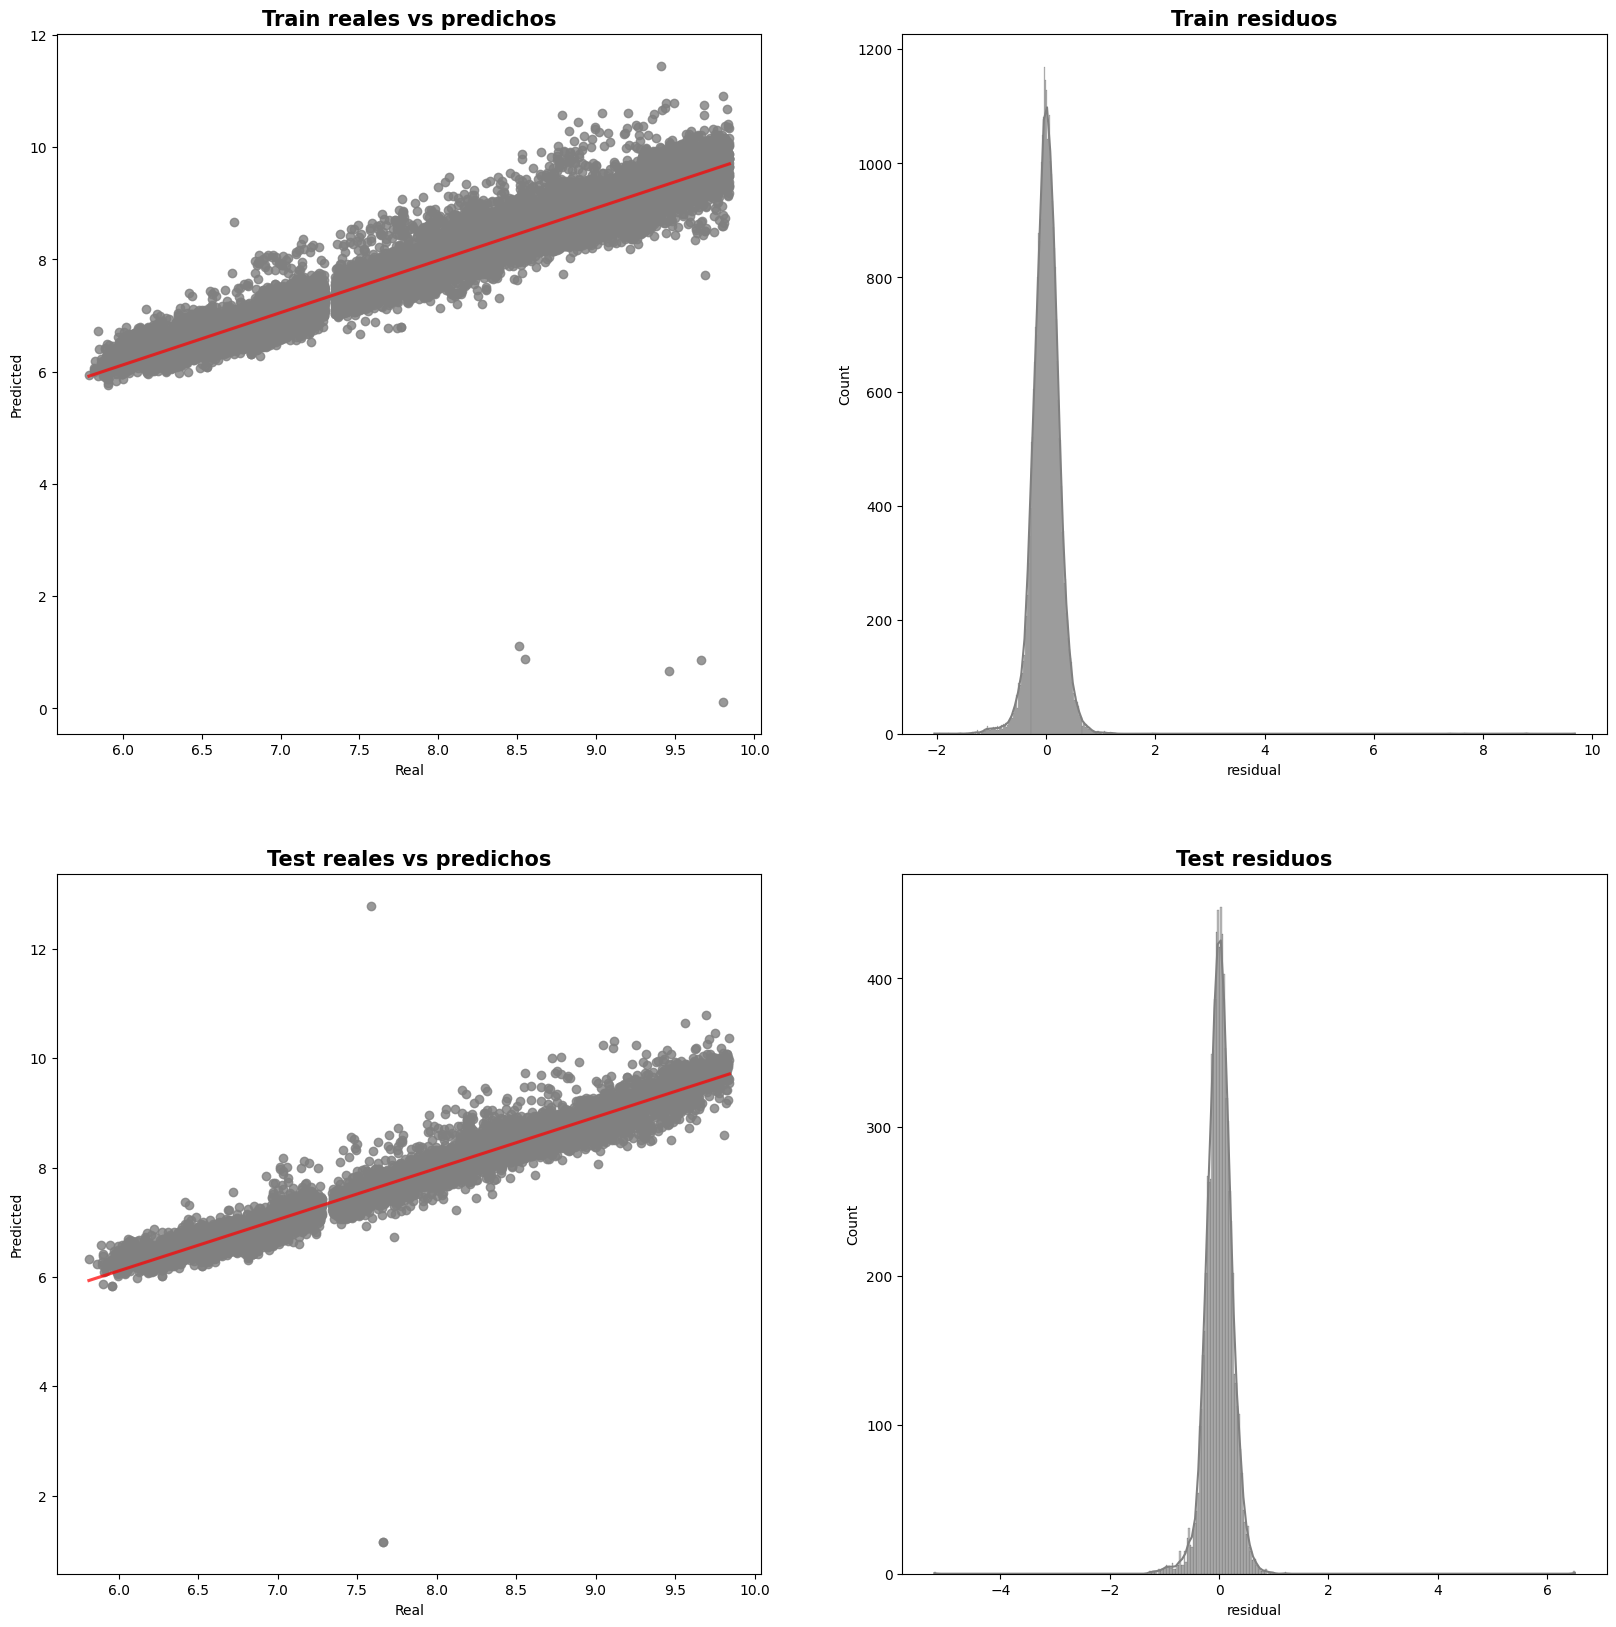

In [27]:
# Ploteamos para visaulizar en los reales vs los predichos del train y del test
# ==============================================================================

fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = results[results['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = results[results['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(results[results['Set'] == "Train"],
             x="residual",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(results[results['Set'] == "Test"],
             x="residual",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [28]:
# Generamos una función para sacar todas las variables para medir la eficacia de nuestro modelo
# ==============================================================================

def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [29]:
# Comprobamos los resultados de nuestro modelo
# ==============================================================================

lr_results = metricas(y_test, y_train, y_pred_test, y_pred_train, "Regresion lineal")
lr_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.178350,0.068988,0.262656,0.932448,test,Regresion lineal
1,0.181901,0.069603,0.263824,0.932883,train,Regresion lineal


# 6- Decision Tree

In [30]:
# Iniciamos el método de Decission Tree. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta
# ==============================================================================

regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_train_dt = regressor.predict(X_train)
y_pred_test_dt = regressor.predict(X_test)

# Sacamos las max features y y el max depth para ajustar nuestro árbol
# ==============================================================================

max_features = np.sqrt(len(X_train.columns))

max_features, (regressor.tree_.max_depth)

(3.0, 35)

In [31]:
X_train

,carat,depth,table,x,y,z,cut_oe,color_oe,clarity_oe
32121,1.265625,-0.333333,1.333333,0.896175,0.912088,0.875000,2,4,3
9831,0.843750,-0.533333,0.000000,0.666667,0.686813,0.633929,4,3,4
33128,1.531250,1.666667,1.000000,0.978142,0.956044,1.142857,1,5,0
6199,-0.437500,0.133333,-0.666667,-0.480874,-0.478022,-0.473214,4,5,2
19661,0.000000,0.200000,-0.666667,0.000000,0.010989,0.017857,4,3,5
...,...,...,...,...,...,...,...,...,...
6265,-0.453125,0.000000,0.666667,-0.480874,-0.510989,-0.500000,3,3,7
11284,0.484375,0.333333,0.333333,0.409836,0.390110,0.428571,3,4,7
38158,0.000000,0.866667,2.333333,-0.043716,-0.065934,0.008929,1,4,7
860,-0.125000,-0.600000,0.666667,-0.092896,-0.120879,-0.151786,3,6,6


In [32]:
# Comprobamos los resultados de nuestro modelo
# ==============================================================================

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.087077,0.016433,0.128192,0.983909,test,Decission Tree I
1,0.000169,0.000014,0.003707,0.999987,train,Decission Tree I


In [33]:
# Generación del GridSearch con los valores máximos que hemos sacado 
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [34]:
# Iniciamos el método con los máximos params
# ==============================================================================

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
# Sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_
# ==============================================================================

best_tree = gs.best_estimator_

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

# Comprobamos los resultados de nuestro modelo
# ==============================================================================

dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.096974,0.018616,0.136441,0.981771,test,Decision tree II
1,0.083620,0.013017,0.114091,0.987448,train,Decision tree II


In [36]:
# Concatenamos al resto de resultados para comparar cuál es el mejor modelo
# ==============================================================================

df_all = pd.concat([lr_results, dt_results1, dt_results2], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.178350,0.068988,0.262656,0.932448,test,Regresion lineal
1,0.181901,0.069603,0.263824,0.932883,train,Regresion lineal
0,0.087077,0.016433,0.128192,0.983909,test,Decission Tree I
1,0.000169,0.000014,0.003707,0.999987,train,Decission Tree I
0,0.096974,0.018616,0.136441,0.981771,test,Decision tree II
1,0.083620,0.013017,0.114091,0.987448,train,Decision tree II


In [37]:
# Sacamos cuáles son las variables más importantes para nuesto Decision Tree
# ==============================================================================

importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': regressor.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values( ascending=False, by= "importancia", inplace=True)
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,y,0.866014
0,carat,0.070823
8,clarity_oe,0.030534
7,color_oe,0.014626
3,x,0.012296
5,z,0.001903
1,depth,0.001509
2,table,0.001191
6,cut_oe,0.001104


# 7- Random Forest

In [38]:
# Generación del GridSearch con los valores máximos que hemos sacado del Decision Tree
# ==============================================================================

param = {"max_depth": [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4]}

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [39]:
# Fiteamos nuestro modelo
# ==============================================================================

%time
bosque.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
# Sacamos los mejores parámetros de nuestro Random Forest
# ==============================================================================

bos = bosque.best_estimator_

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)

# Comprobamos los resultados de nuestro modelo
# ==============================================================================

rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.071202,0.009434,0.097128,0.990763,test,Random Forest
1,0.047593,0.004189,0.064725,0.995960,train,Random Forest


In [41]:
# Concatenamos al resto de resultados para comparar cuál es el mejor modelo
# ==============================================================================

df_all = pd.concat([df_all, rf_results ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.178350,0.068988,0.262656,0.932448,test,Regresion lineal
1,0.181901,0.069603,0.263824,0.932883,train,Regresion lineal
0,0.087077,0.016433,0.128192,0.983909,test,Decission Tree I
1,0.000169,0.000014,0.003707,0.999987,train,Decission Tree I
0,0.096974,0.018616,0.136441,0.981771,test,Decision tree II
1,0.083620,0.013017,0.114091,0.987448,train,Decision tree II
0,0.071202,0.009434,0.097128,0.990763,test,Random Forest
1,0.047593,0.004189,0.064725,0.995960,train,Random Forest


In [42]:
# Sacamos cuáles son las variables más importantes para nuesto Random Forest
# ==============================================================================

importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': bos.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf.sort_values( ascending=False, by= "importancia", inplace=True)
importancia_predictores_rf

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,y,0.382670
0,carat,0.284061
3,x,0.188382
5,z,0.097537
8,clarity_oe,0.028957
7,color_oe,0.012562
6,cut_oe,0.001964
1,depth,0.001950
2,table,0.001917


# 8- Gradient Boosting

In [43]:
# Generación del GridSearch con los valores máximos que hemos sacado del Decision Tree
# ==============================================================================

param = {"max_depth": [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4]}

gradient = GridSearchCV(
            estimator=GradientBoostingRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [44]:
# Fiteamos nuestro modelo
# ==============================================================================

%time
gradient.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
# Sacamos los mejores parámetros de nuestro Gradient Boosting
# ==============================================================================

grad = gradient.best_estimator_

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test_rf = grad.predict(X_test)
y_pred_train_rf = grad.predict(X_train)

# Comprobamos los resultados de nuestro modelo
# ==============================================================================

gb_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Gradient Boosting")
gb_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.062622,0.007719,0.087860,0.992441,test,Gradient Boosting
1,0.046419,0.003966,0.062978,0.996175,train,Gradient Boosting


In [46]:
# Concatenamos al resto de resultados para comparar cuál es el mejor modelo
# ==============================================================================

df_all = pd.concat([df_all, gb_results ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.178350,0.068988,0.262656,0.932448,test,Regresion lineal
1,0.181901,0.069603,0.263824,0.932883,train,Regresion lineal
0,0.087077,0.016433,0.128192,0.983909,test,Decission Tree I
1,0.000169,0.000014,0.003707,0.999987,train,Decission Tree I
0,0.096974,0.018616,0.136441,0.981771,test,Decision tree II
1,0.083620,0.013017,0.114091,0.987448,train,Decision tree II
0,0.071202,0.009434,0.097128,0.990763,test,Random Forest
1,0.047593,0.004189,0.064725,0.995960,train,Random Forest
0,0.062622,0.007719,0.087860,0.992441,test,Gradient Boosting
1,0.046419,0.003966,0.062978,0.996175,train,Gradient Boosting


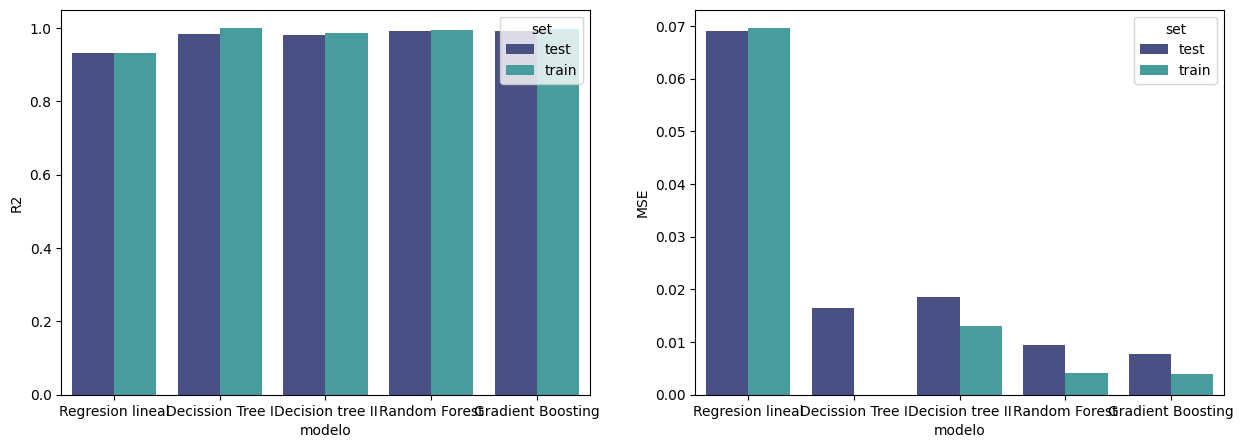

In [47]:
# Visualizamos las variables que nos interesan para detectar cuál es nuestro mejor modelo, el R2 y el MSE en éste caso
# ==============================================================================

fig, axes = plt.subplots(1,2, figsize =(15,5))

sns.barplot(data = df_all, x = "modelo", y = "R2", hue = "set", ax = axes[0], palette="mako")
sns.barplot(data = df_all, x = "modelo", y = "MSE", hue = "set",ax = axes[1], palette = "mako");

In [48]:
# Sacamos cuáles son las variables más importantes para nuesto Gradient Boosting
# ==============================================================================

importancia_predictores_gb = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': grad.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_gb.sort_values( ascending=False, by= "importancia", inplace=True)
importancia_predictores_gb

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,carat,0.400613
4,y,0.327016
3,x,0.139737
5,z,0.083321
8,clarity_oe,0.031011
7,color_oe,0.014284
6,cut_oe,0.002060
1,depth,0.001243
2,table,0.000714


# 9- Ajuste del Modelo

In [49]:
# Ahora sabiendo la importancia de las variables para cada modelo, ajustamos el df que vamos a utilizar y creamos una copia
# ==============================================================================

df_dt = df_encoded.copy()
df_rf = df_encoded.copy()
df_4cs = df_encoded.copy()

In [50]:
# Ajustamos primero el Decision Tree, dropeando las variables con menor importancia
# ==============================================================================

df_dt.drop(["color_oe", "x", "z", "depth", "table", "cut_oe"], axis=1, inplace = True)
df_dt.head()

,carat,y,price,clarity_oe
0,-0.625000,-0.780220,6.353,5
1,0.484375,0.417582,9.183,3
2,0.031250,0.021978,7.983,6
3,0.593750,0.439560,8.371,5
4,-0.531250,-0.631868,6.588,4


In [51]:
# Ajustamos ahora el Random Forest, dropeando las variables con menor importancia
# ==============================================================================

df_rf.drop(["clarity_oe", "color_oe", "table", "depth", "cut_oe"], axis=1, inplace = True)
df_rf.head()

,carat,x,y,z,price
0,-0.625000,-0.754098,-0.780220,-0.750000,6.353
1,0.484375,0.398907,0.417582,0.464286,9.183
2,0.031250,0.010929,0.021978,0.017857,7.983
3,0.593750,0.464481,0.439560,0.535714,8.371
4,-0.531250,-0.650273,-0.631868,-0.625000,6.588


In [52]:
# Ajustamos ahora el df según las 4c's que se corresponden con cómo se mide el valor real de un diamante
# ==============================================================================

df_4cs.drop(["depth", "table", "x", "y", "z"], axis=1, inplace = True)
df_4cs.head()

,carat,price,cut_oe,color_oe,clarity_oe
0,-0.625000,6.353,3,2,5
1,0.484375,9.183,4,5,3
2,0.031250,7.983,4,4,6
3,0.593750,8.371,2,6,5
4,-0.531250,6.588,3,6,4


In [53]:
# Reparto de datos en train y test para el Decision Tree
# ==============================================================================

X = df_dt.drop(["price"], axis = 1)
y = df_dt["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [54]:
# Generación del GridSearch con los valores máximos que hemos sacado 
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4]}

gs2 = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [55]:
# Iniciamos el método con los máximos params
# ==============================================================================

%time
gs2.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
# Sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_
# ==============================================================================

best_tree2 = gs2.best_estimator_

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test_dt3 = best_tree2.predict(X_test)
y_pred_train_dt3 = best_tree2.predict(X_train)

# Comprobamos los resultados de nuestro modelo
# ==============================================================================

dt_results3 = metricas(y_test, y_train, y_pred_test_dt3, y_pred_train_dt3, "Decision Tree III (solo importancia)")
dt_results3

,MAE,MSE,RMSE,R2,set,modelo
0,0.131438,0.028817,0.169756,0.971783,test,Decision Tree III (solo importancia)
1,0.126550,0.026704,0.163412,0.974250,train,Decision Tree III (solo importancia)


In [57]:
# Reparto de datos en train y test para el Random Forest
# ==============================================================================

X = df_rf.drop(["price"], axis = 1)
y = df_rf["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [58]:
# Generación del GridSearch con los valores máximos que hemos sacado del Decision Tree
# ==============================================================================

param = {"max_depth": [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4]}

bosque2 = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [59]:
# Fiteamos nuestro modelo
# ==============================================================================

%time
bosque2.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 4, 8, 12, 16, 20, 24, 28, 32, 36],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
# Sacamos los mejores parámetros de nuestro Random Forest
# ==============================================================================

bos2 = bosque2.best_estimator_

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test_rf2 = bos2.predict(X_test)
y_pred_train_rf2 = bos2.predict(X_train)

# Comprobamos los resultados de nuestro modelo
# ==============================================================================

rf_results2 = metricas(y_test, y_train, y_pred_test_rf2, y_pred_train_rf2, "Random Forest II (solo importancia)")
rf_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.182620,0.054258,0.232933,0.946872,test,Random Forest II (solo importancia)
1,0.171797,0.047768,0.218558,0.953939,train,Random Forest II (solo importancia)


In [61]:
# Concatenamos al resto de resultados para comparar cuál es el mejor modelo
# ==============================================================================

df_all = pd.concat([df_all, dt_results3, rf_results2], axis = 0).reset_index()

df_all

,index,MAE,MSE,RMSE,R2,set,modelo
0,0,0.178350,0.068988,0.262656,0.932448,test,Regresion lineal
1,1,0.181901,0.069603,0.263824,0.932883,train,Regresion lineal
2,0,0.087077,0.016433,0.128192,0.983909,test,Decission Tree I
3,1,0.000169,0.000014,0.003707,0.999987,train,Decission Tree I
4,0,0.096974,0.018616,0.136441,0.981771,test,Decision tree II
5,1,0.083620,0.013017,0.114091,0.987448,train,Decision tree II
6,0,0.071202,0.009434,0.097128,0.990763,test,Random Forest
7,1,0.047593,0.004189,0.064725,0.995960,train,Random Forest
8,0,0.062622,0.007719,0.087860,0.992441,test,Gradient Boosting
9,1,0.046419,0.003966,0.062978,0.996175,train,Gradient Boosting


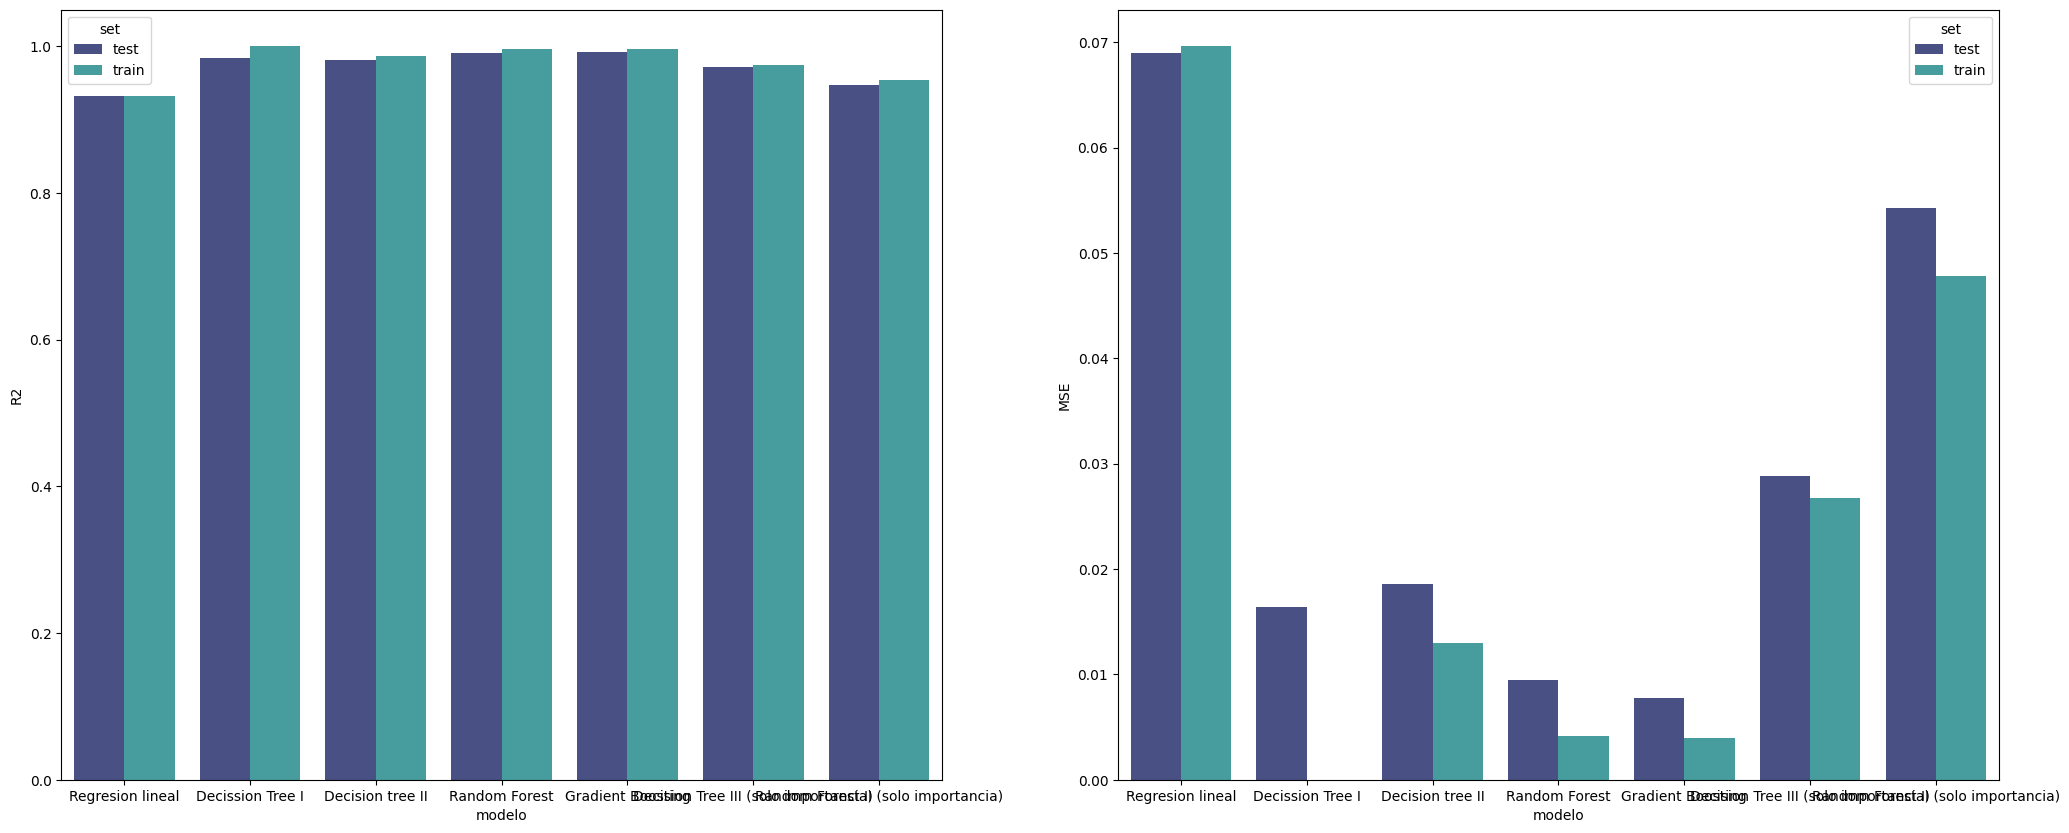

In [62]:
# Visualizamos las variables que nos interesan para detectar cuál es nuestro mejor modelo, el R2 y el MSE en éste caso
# ==============================================================================

fig, axes = plt.subplots(1,2, figsize =(25,10))

sns.barplot(data = df_all, x = "modelo", y = "R2", hue = "set", ax = axes[0], palette="mako")
sns.barplot(data = df_all, x = "modelo", y = "MSE", hue = "set",ax = axes[1], palette = "mako");

In [63]:
# Reparto de datos en train y test para el df de las 4c's
# ==============================================================================

X2 = df_4cs.drop(["price"], axis = 1)
y2 = df_4cs["price"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size   = 0.8, random_state = 42)

In [64]:
# Iniciamos el método de Linear Regression. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta
# ==============================================================================

lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test2 = lr2.predict(X_test2)
y_pred_train2 = lr2.predict(X_train2)

In [65]:
# Comprobamos los resultados de nuestro modelo
# ==============================================================================

lr_results1 = metricas(y_test2, y_train2, y_pred_test2, y_pred_train2, "Regresion lineal")
lr_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.292989,0.142062,0.376912,0.860894,test,Regresion lineal
1,0.298884,0.150277,0.387656,0.855091,train,Regresion lineal


In [66]:
# Iniciamos el método de Decission Tree. Ajustamos el modelo con .fit() donde le tendremos que pasar las variables predictoras y la respuesta
# ==============================================================================

regressor2 = DecisionTreeRegressor(random_state = 0) 
  
regressor2.fit(X_train2, y_train2)

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_train_dt = regressor2.predict(X_train2)
y_pred_test_dt = regressor2.predict(X_test2)

# Sacamos las max features y y el max depth para ajustar nuestro árbol
# ==============================================================================

max_features = np.sqrt(len(X_train2.columns))

max_features, (regressor2.tree_.max_depth)

(2.0, 26)

In [67]:
# Generación del GridSearch con los valores máximos que hemos sacado 
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [1, 4, 8, 12, 16, 20, 24],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3]}

gs3 = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [68]:
# Iniciamos el método con los máximos params
# ==============================================================================

%time
gs3.fit(X_train2, y_train2)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 4, 8, 12, 16, 20, 24],
                         'max_features': [1, 2, 3],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
# Sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_
# ==============================================================================

best_tree3 = gs3.best_estimator_

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test_dt3 = best_tree3.predict(X_test2)
y_pred_train_dt3 = best_tree3.predict(X_train2)

# Comprobamos los resultados de nuestro modelo
# ==============================================================================

dt_results4 = metricas(y_test2, y_train2, y_pred_test_dt3, y_pred_train_dt3, "Decision Tree")
dt_results4

,MAE,MSE,RMSE,R2,set,modelo
0,0.084452,0.012584,0.112180,0.987678,test,Decision Tree
1,0.069426,0.008407,0.091688,0.991894,train,Decision Tree


In [70]:
# Generación del GridSearch con los valores máximos que hemos sacado del Decision Tree
# ==============================================================================

param = {"max_depth": [1, 4, 8, 12, 16, 20, 24],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3]}

bosque3 = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [71]:
# Fiteamos nuestro modelo
# ==============================================================================

%time
bosque3.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 4, 8, 12, 16, 20, 24],
                         'max_features': [1, 2, 3],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
# Sacamos los mejores parámetros de nuestro Random Forest
# ==============================================================================

bos3 = bosque3.best_estimator_

# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
# ==============================================================================

y_pred_test_rf2 = bos3.predict(X_test2)
y_pred_train_rf2 = bos3.predict(X_train2)

# Comprobamos los resultados de nuestro modelo
# ==============================================================================

rf_results3 = metricas(y_test2, y_train2, y_pred_test_rf2, y_pred_train_rf2, "Random Forest")
rf_results3

,MAE,MSE,RMSE,R2,set,modelo
0,0.078087,0.010545,0.102689,0.989674,test,Random Forest
1,0.068312,0.008027,0.089593,0.992260,train,Random Forest


In [73]:
# Concatenamos al resto de resultados para comparar cuál es el mejor modelo
# ==============================================================================

df_all1 = pd.concat([lr_results1, dt_results4, rf_results3], axis = 0).reset_index()

df_all1

,index,MAE,MSE,RMSE,R2,set,modelo
0,0,0.292989,0.142062,0.376912,0.860894,test,Regresion lineal
1,1,0.298884,0.150277,0.387656,0.855091,train,Regresion lineal
2,0,0.084452,0.012584,0.112180,0.987678,test,Decision Tree
3,1,0.069426,0.008407,0.091688,0.991894,train,Decision Tree
4,0,0.078087,0.010545,0.102689,0.989674,test,Random Forest
5,1,0.068312,0.008027,0.089593,0.992260,train,Random Forest


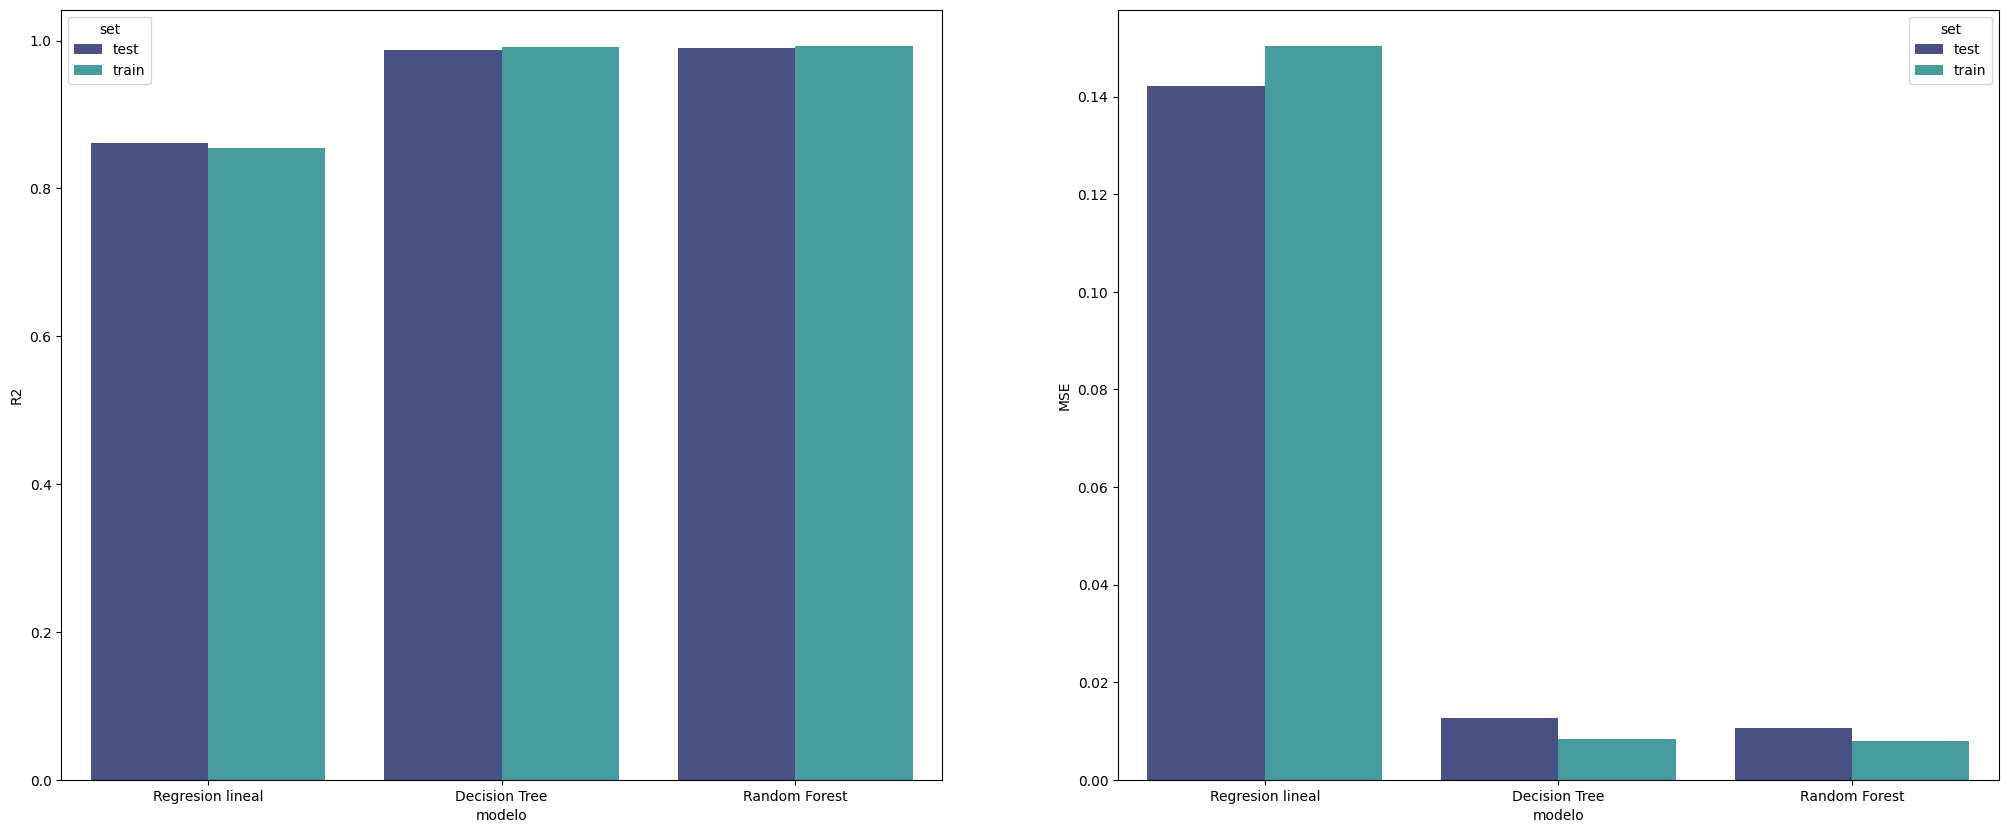

In [74]:
# Visualizamos las variables que nos interesan para detectar cuál es nuestro mejor modelo, el R2 y el MSE en éste caso
# ==============================================================================

fig, axes = plt.subplots(1,2, figsize =(25,10))

sns.barplot(data = df_all1, x = "modelo", y = "R2", hue = "set", ax = axes[0], palette="mako")
sns.barplot(data = df_all1, x = "modelo", y = "MSE", hue = "set",ax = axes[1], palette = "mako");

In [75]:
# Guardamos el mejor modelo
# ==============================================================================

with open(f'../data/best_modelo_dtI.pkl', 'wb') as modelo:
        pickle.dump(regressor, modelo)

In [76]:
# Guardamos el mejor modelo
# ==============================================================================

with open(f'../data/best_modelo_GB.pkl', 'wb') as modelo2:
        pickle.dump(grad, modelo2)